ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.1 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflo

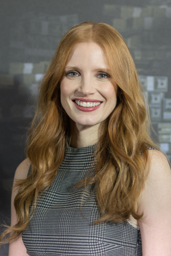

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images
from fastcore.all import *


def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

urls = search_images('Jessica Chastain', max_images=1)
urls[0]

from fastdownload import download_url
dest = 'jessica_chastain.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)    

In [2]:
download_url(search_images('Bryce Dallas Howard', max_images=1)[0], 'bryce_dallas_howard.jpg', show_progress=False)
Image.open('bryce_dallas_howard.jpg').to_thumb(256,256) 

download_url(search_images('Isla fisher', max_images=1)[0], 'isla_fisher.jpg', show_progress=False)
Image.open('isla_fisher.jpg').to_thumb(256,256) 

download_url(search_images('Amy Adams', max_images=1)[0], 'amy_adams.jpg', show_progress=False)
Image.open('amy_adams.jpg').to_thumb(256,256) 


searches = 'Jessica Chastain','Bryce Dallas Howard','Isla Fisher','Amy Adams'
path = Path('actress_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)
    
# this next one removes failed links     
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)    



Searching for 'Bryce Dallas Howard'
Searching for 'Isla fisher'
Searching for 'Amy Adams'
Searching for 'Jessica Chastain photo'
Searching for 'Bryce Dallas Howard photo'
Searching for 'Isla Fisher photo'
Searching for 'Amy Adams photo'


3

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.398506,2.845035,0.681818,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.637626,1.983088,0.590909,00:08
1,1.380495,1.376917,0.590909,00:08
2,1.093259,1.101139,0.454545,00:08


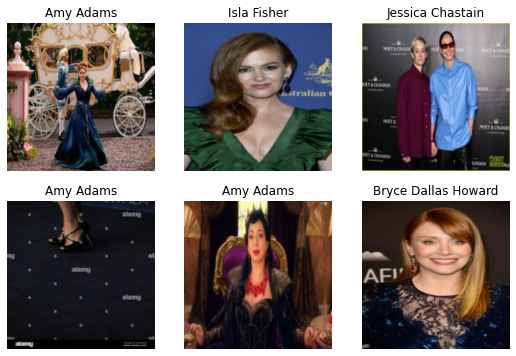

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, ##returns all our images
    splitter=RandomSplitter(valid_pct=0.2, seed=42),##randomly set aside 20 per cent fo the data for validation
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')] ##inputs have to be the same size
).dataloaders(path, bs=32) # feeds the training algorithm with a batch of images

dls.show_batch(max_n=6)

learn = vision_learner(dls, resnet18, metrics=error_rate) ## we pass in the model called resnet which is normally fine for us
learn.fine_tune(3) # fine tune applies best practises



In [4]:
is_actor,_,probs = learn.predict(PILImage.create('amy_adams.jpg'))
print(f"This is : {is_actor}.")


This is : Isla Fisher.
